In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_fwf(
    "./data/auto-mpg.data",
    names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.describe(include='O')

,horsepower,car_name
count,398,398
unique,94,305
top,150.0,"""ford pinto"""
freq,22,6


In [7]:
df[df["horsepower"].str.contains(r"[^0-9.]", regex=True, na=False)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [8]:
cleaned_df = df.copy()

In [9]:
cleaned_df["horsepower"] = cleaned_df["horsepower"].replace("?", np.nan)
cleaned_df["horsepower"] = pd.to_numeric(cleaned_df["horsepower"], errors='coerce')

cleaned_df["car_name"] = cleaned_df["car_name"].str.replace("\"", "")
cleaned_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


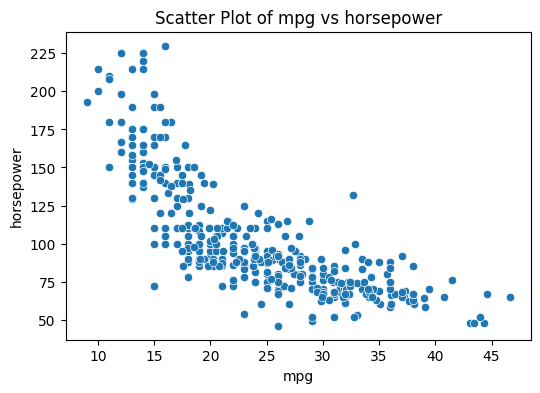

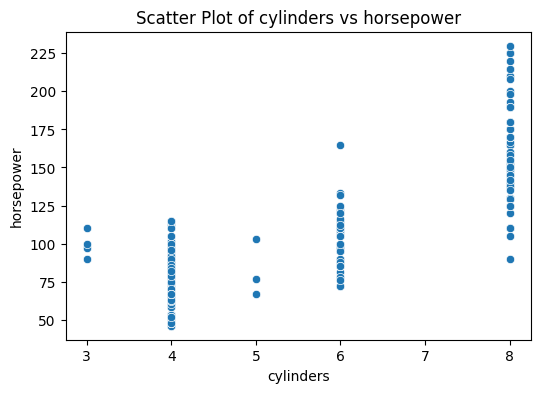

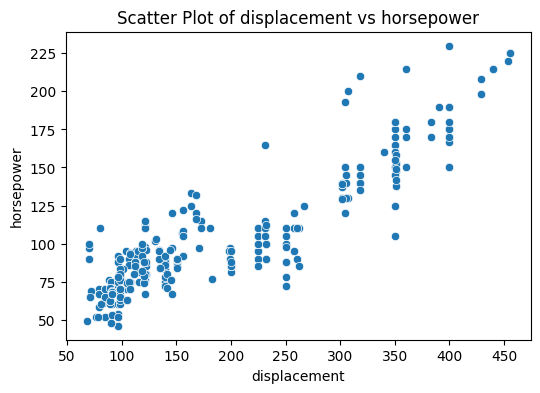

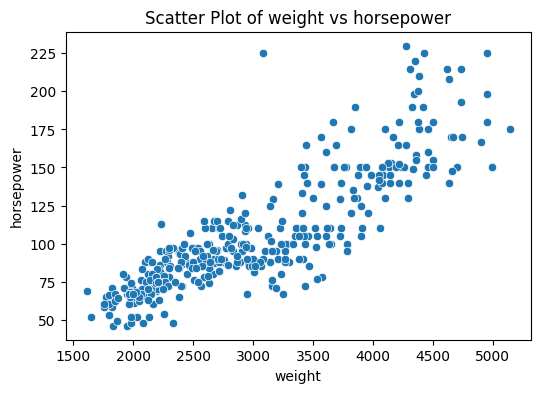

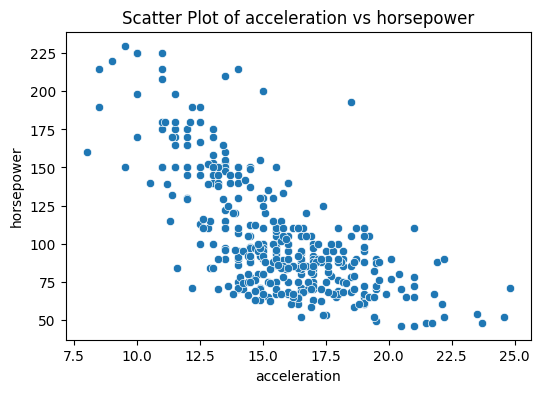

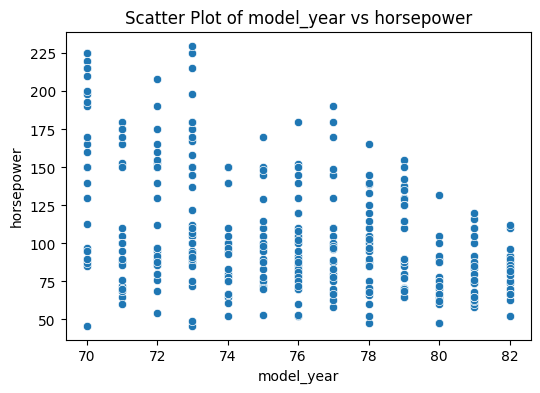

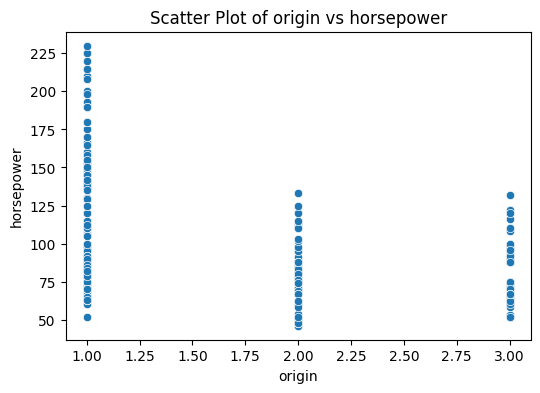

In [10]:
# Select only numeric columns
numeric_columns = cleaned_df.select_dtypes(include=['number']).columns

# Create scatter plots of each numeric column against 'mpg'
for col in numeric_columns:
    if col != "horsepower":  # Exclude 'horsepower' itself
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=cleaned_df[col], y=cleaned_df["horsepower"])
        plt.xlabel(col)
        plt.ylabel("horsepower")
        plt.title(f"Scatter Plot of {col} vs horsepower")
        plt.show()

## Simple Linear Regression
Let's try an inference question, for example I want to know how weight affects horsepower of a vehicle

In [11]:
x_vars = cleaned_df[["weight"]]
y_var = cleaned_df["horsepower"]

x_vars = sm.add_constant(x_vars)

model = sm.OLS(y_var, x_vars, missing="drop", hasconst=True).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          1.36e-118
Time:                        17:36:14   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1835      3.570     -3.412      0.0

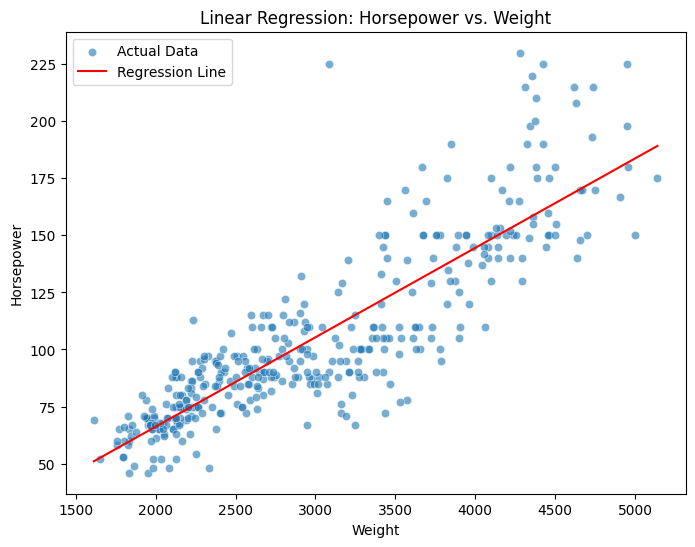

In [12]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=cleaned_df["weight"], y=cleaned_df["horsepower"], label="Actual Data", alpha=0.6)

# Generate predictions
x_vals = np.linspace(cleaned_df["weight"].min(), cleaned_df["weight"].max(), 100)
x_vals_const = sm.add_constant(x_vals)  # Add intercept term
y_preds = model.predict(x_vals_const)

# Plot regression line
plt.plot(x_vals, y_preds, color="red", label="Regression Line")

# Labels and title
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.title("Linear Regression: Horsepower vs. Weight")
plt.legend()
plt.show()

In [13]:
single_var_resid = model.resid

single_var_resid

0       4.907210
1      32.502753
2      27.571247
3      27.688778
4      17.061946
         ...    
393   -11.120399
394   -19.263566
395     6.272226
396   -11.656190
397   -12.378007
Length: 392, dtype: float64

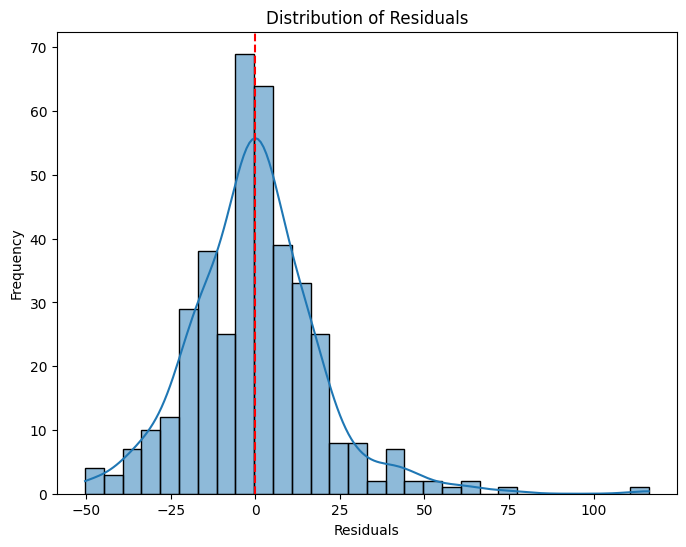

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(single_var_resid, kde=True, bins=30)
plt.axvline(0, color="red", linestyle="dashed")  # Line at zero residual
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

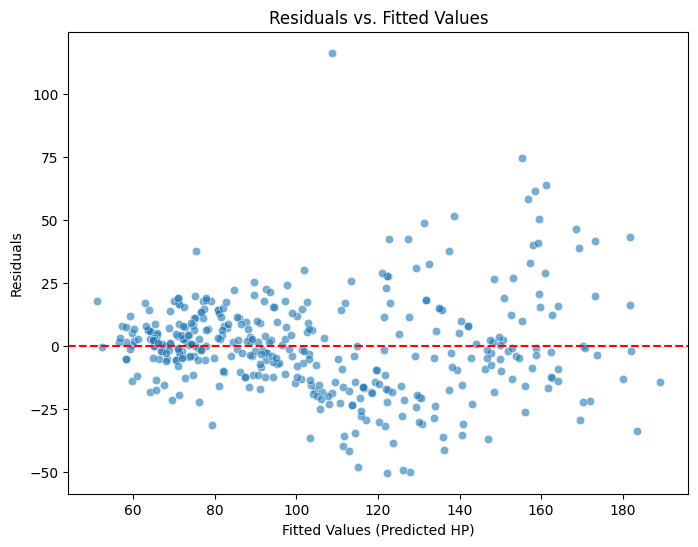

In [15]:
fitted_values = model.fittedvalues  # Predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=single_var_resid, alpha=0.6)
plt.axhline(0, color="red", linestyle="dashed")  # Reference line at 0
plt.xlabel("Fitted Values (Predicted HP)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

## Multi-Linear Regression

In [16]:
x_vars = cleaned_df[["mpg", "cylinders", "acceleration"]]
y_var = cleaned_df["horsepower"]

x_vars = sm.add_constant(x_vars)

multi_model = sm.OLS(y_var, x_vars, missing="drop", hasconst=True).fit()

print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     658.3
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          8.86e-152
Time:                        17:36:15   Log-Likelihood:                -1632.6
No. Observations:                 392   AIC:                             3273.
Df Residuals:                     388   BIC:                             3289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          156.0305      9.712     16.066   

In [17]:
# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars.columns
vif_data["VIF"] = [variance_inflation_factor(x_vars.values, i) for i in range(x_vars.shape[1])]

print(vif_data)

       Variable         VIF
0         const  151.037616
1           mpg    2.514596
2     cylinders    2.780750
3  acceleration    1.346747


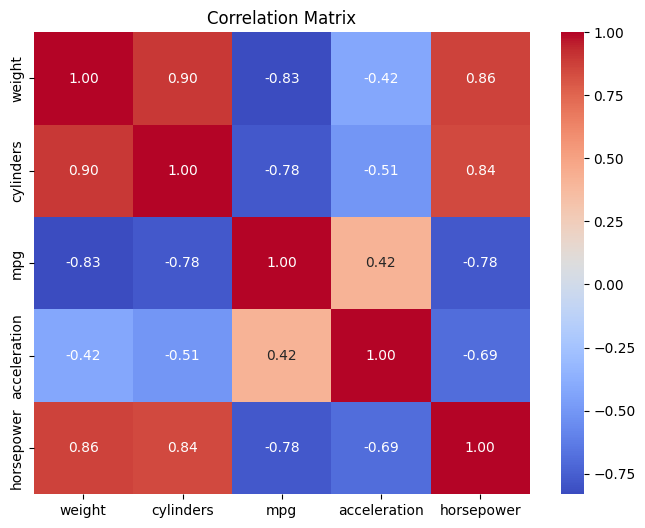

In [18]:
# Compute correlation matrix
corr_matrix = cleaned_df[["weight", "cylinders", "mpg", "acceleration", "horsepower"]].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
cleaned_df["log_mpg"] = np.log(cleaned_df["mpg"])

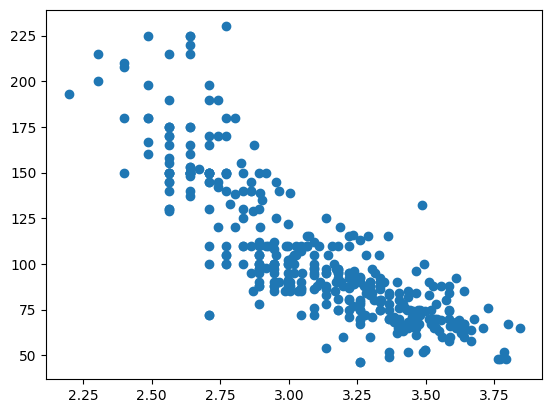

In [20]:
plt.scatter(cleaned_df["log_mpg"], cleaned_df["horsepower"])

In [21]:
x_vars = cleaned_df[["log_mpg", "cylinders", "acceleration"]]
y_var = cleaned_df["horsepower"]

x_vars = sm.add_constant(x_vars)

multi_transform_model = sm.OLS(y_var, x_vars, missing="drop", hasconst=True).fit()

print(multi_transform_model.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     741.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          2.88e-160
Time:                        17:36:16   Log-Likelihood:                -1612.8
No. Observations:                 392   AIC:                             3234.
Df Residuals:                     388   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          270.6910     16.824     16.089   

In [22]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars.columns
vif_data["VIF"] = [variance_inflation_factor(x_vars.values, i) for i in range(x_vars.shape[1])]

print(vif_data)

       Variable         VIF
0         const  500.687817
1       log_mpg    3.154212
2     cylinders    3.394429
3  acceleration    1.347698


### Add Interactions

In [23]:
cleaned_df["log_mpg_x_cyl"] = cleaned_df["log_mpg"] * cleaned_df["cylinders"]

In [25]:
x_vars = cleaned_df[["log_mpg_x_cyl", "acceleration"]]
y_var = cleaned_df["horsepower"]

x_vars = sm.add_constant(x_vars)

multi_model_with_transforms = sm.OLS(y_var, x_vars, missing="drop", hasconst=True).fit()

print(multi_model_with_transforms.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     427.3
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           6.75e-99
Time:                        17:36:32   Log-Likelihood:                -1758.9
No. Observations:                 392   AIC:                             3524.
Df Residuals:                     389   BIC:                             3536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           114.4495     10.616     10.781

In [26]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars.columns
vif_data["VIF"] = [variance_inflation_factor(x_vars.values, i) for i in range(x_vars.shape[1])]

print(vif_data)

        Variable        VIF
0          const  95.339791
1  log_mpg_x_cyl   1.255116
2   acceleration   1.255116


## Predictive Modelling

In [27]:
without_unknowns_df = cleaned_df.dropna().copy()
unknowns_df = cleaned_df[cleaned_df["horsepower"].isna()].copy()

In [28]:
# Define predictor variables and target
X = without_unknowns_df[["log_mpg", "cylinders", "acceleration"]]
y = without_unknowns_df["horsepower"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Print coefficients
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: 264.6950352939597
Coefficients: [-42.49342592   8.07476155  -4.66421994]


In [30]:
# Training Set Performance
y_train_pred = lm.predict(X_train)
train_r2 = lm.score(X_train, y_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)

print(f"Train R^2: {train_r2:.3f}")
print(f"Train RMSE: {train_rmse:.2f}")

Train R^2: 0.856
Train RMSE: 14.52


In [31]:
# Predict on test set
y_pred = lm.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2_test = lm.score(X_test, y_test)  # R² on test data

print(f"Test Set R^2: {r2_test:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Test Set R^2: 0.835
Mean Absolute Error (MAE): 11.79
Root Mean Squared Error (RMSE): 15.97


Let's predict on the unknown HPs!

In [32]:
predict_unknowns = lm.predict(unknowns_df[["log_mpg", "cylinders", "acceleration"]])

predict_unknowns

array([ 71.59284123, 104.47967695,  58.60444613,  95.96353339,
        72.83191373,  68.13968154])

In [33]:
predicted_df = unknowns_df[["car_name", "model_year", "cylinders"]].copy()

predicted_df["horsepower"] = predict_unknowns

predicted_df

,car_name,model_year,cylinders,horsepower
32,ford pinto,71,4,71.592841
126,ford maverick,74,6,104.479677
330,renault lecar deluxe,80,4,58.604446
336,ford mustang cobra,80,4,95.963533
354,renault 18i,81,4,72.831914
374,amc concord dl,82,4,68.139682


### Experimentation

In [34]:
numeric_columns_with_features = numeric_columns.append(pd.Index(["log_mpg", "log_mpg_x_cyl"]))
numeric_columns_with_features = numeric_columns_with_features.drop("horsepower")

In [35]:
# Define predictor variables and target
X = without_unknowns_df[numeric_columns_with_features]
y = without_unknowns_df["horsepower"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Define different feature sets
feature_sets = {
    "Baseline": ["log_mpg", "cylinders"],
    "With Acceleration": ["log_mpg", "cylinders", "acceleration"],
    "Interaction Term": ["log_mpg", "cylinders", "acceleration", "log_mpg_x_cyl"],
    "KBest": ['cylinders', 'displacement', 'weight', 'log_mpg']
}

# Train & evaluate models
results = {}

for name, features in feature_sets.items():
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    
    y_pred = model.predict(X_test_subset)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    results[name] = rmse

# Print results
for model_name, rmse in results.items():
    print(f"{model_name}: RMSE = {rmse:.2f}")

Baseline: RMSE = 19.00
With Acceleration: RMSE = 15.97
Interaction Term: RMSE = 14.32
KBest: RMSE = 15.12


#### The Automated Ways

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k best features
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['cylinders', 'displacement', 'weight', 'log_mpg'], dtype='object')
